Osnabrück University - Computer Vision (Winter Term 2021/22) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 01: Basic Operations - Convolution

## Introduction

This is the first "real" homework sheet.

The homework sheets will usually be available on Tuesdays before the practice session and are supposed to be solved in groups of three. They have to be handed in before the next practice session in the following week. The exercises are then presented to your tutor in a small feedback session. To acquire the admission for the final exam, you will have to pass 𝑁−2 of the weekly provided exercise sheets.

Sign up for a group on Stud.IP if you have not already done so(See Participants -> Functions/Groups). The times mentioned there are the times for the feedback session of your group. If none of them fits, send any of the tutors an e-mail so we can try to arrange something.

Your group will have a group folder in Stud.IP under Documents. Upload your solutions there to hand them in.

This week's sheet should be solved and handed in before **Tuesday, November 9, 2021, 2:00pm**. Please upload your results to your group's Stud.IP folder.

## Assignment 1: Twodimensional Convolution [8 Points]

This exercise is purely theoretical and does not require implementation.

### a) Definition

Describe in your own words how convolution works.

Convolutions transform an input image to an output image with the help of kernels. Kernels are filters applied to an image, which results in a new, different, output image. Depending on the filter used, the result of the convolution will vary. How does it work? The filter kernel is applied step by step over each pixel throughout the whole image. If the kernel is aligned exactly with the corresponding set of pixels, we would multiply the kernel values by the overlapped input pixel values. The output image is the result of the weighted sum of each kernel application to the input image. 

### b) Properties
Is convolution linear or non-linear? Is it homogenous or inhomogenous? Proof your answers.

Convolutions are linear and homogenous. This is because the same filter kernel is applied to the every pixel in turn for the entire image. 

### c) Complexity

Assume an image $g$ of size $M\times N$ and a kernel $k$ of size $(2m+1)\times(2n+1)$. How many operations (additions and multiplications) are required to compute a convoluted image $g\ast k$ (of the same size as $g$)?

The result is MN(2m+1)(2n+1) multiplications and additions. 

### d) Separability

What is a separable kernel? Describe, how it can be applied more efficiently. Compute the number of operations for getting $g\ast k$ (as in (c), but with a separable kernel $k$) and compare the results. Assume that the kernel is of size $m \times n$ and the image is of size $M \times N$. Compute the number of operations first for a single pixel and then extend your answer to the whole image. Ignore the normalization of the kernel, i.e. the fraction in front.

Note that here we define the kernel size as $m \times n$ as opposed to Assignment *1c)*. This is a shorter notation.

A separable kernel is the product of multiple simple filters. It's efficiency is due to the fact that it reduces copmutational costs. If one wanted to apply two 2D convolutions to an image the computation would be (m*n*M*N) but by reducing it down to two 1D Filters, it becomes (M*N(m+n)). 

1st step: MN(m) multiplication and addition.
2nd step: MN(n) multiplication and addition
3rd step: MN(m+n) number of operations



## Assignment 2: Applying Convolution [4 Points]

In this exercise you will apply convolution with different kernels. You may use the function `scipy.ndimage.filters.convolve` to solve this task. Check the documentation to learn how to use this function. In this assignment you do not have to implement the convolution yourself. Realize the following filters, describe their effect and possible applications.

### a) Box filter

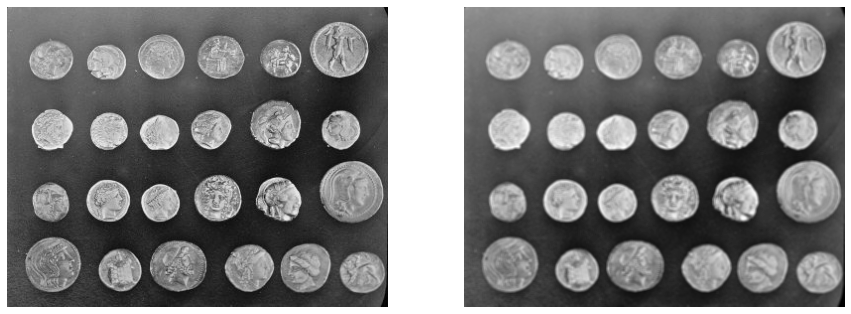

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from imageio import imread
from skimage import data
from scipy.ndimage.filters import convolve

# Load an image
#image = imread('some_file.png', pilmode = 'F')
image = data.coins().astype(np.float32)
k = 1/9*np.array([[1,1,1],
                  [1,1,1],
                  [1,1,1]])

filtered_image = sp.ndimage.convolve(image, k)

fig = plt.figure(figsize=(15,7))
a=fig.add_subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(filtered_image, cmap = 'gray')
plt.axis('off')
plt.show()

### b) Gaussian filter

You may try different filter sizes.

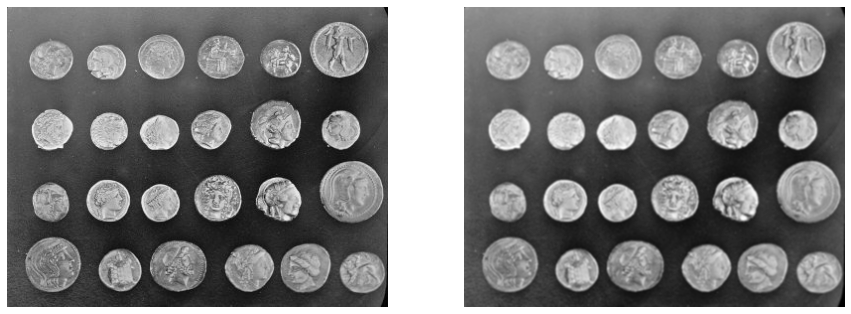

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from imageio import imread
from skimage import data
from scipy.ndimage.filters import gaussian_filter

# Load an image
#image = imread('some_file.png', pilmode = 'F')
image = data.coins().astype(np.float32)
gauss_3 = 1/16 * np.asarray([[1,2,1],
                             [2,4,2],
                             [1,2,1]])
filtered_image = sp.ndimage.convolve(image, gauss_3)

fig = plt.figure(figsize=(15,7))
a=fig.add_subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(filtered_image, cmap = 'gray')
plt.axis('off')
plt.show()

### c) Sobel filter

Try horizontal, vertical, and diagonal sobel filters.

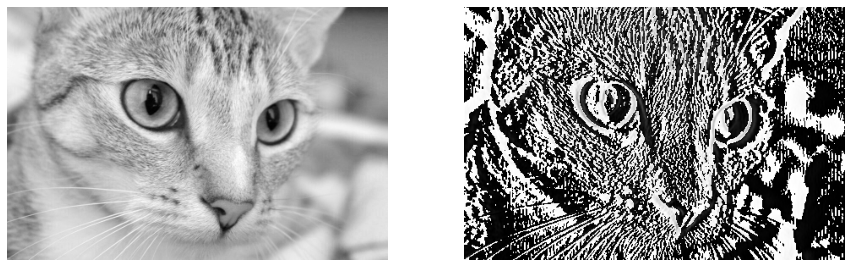

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from imageio import imread
from skimage import data
from scipy.ndimage.filters import sobel

# Load an image
image = imread('imageio:chelsea.png')[:,:,0]

sobel_v = 1/4 * np.asarray([[1,2,1], 
                            [0,0,0], 
                            [-1,-2,-1]])
sobel_h = 1/4 * np.asarray([[1,0,-1], 
                            [2,0,-2], 
                            [1,0,-1]])
sobel_d = 1/4 * np.asarray([[0,-1,-2], 
                            [1,0,-1], 
                            [2,1,0]])

filtered_image = sp.ndimage.convolve(image, sobel_h)

fig = plt.figure(figsize=(15,7))
a=fig.add_subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(filtered_image, cmap = 'gray')
plt.axis('off')
plt.show()

### d) Unsharp Mask

One method to sharpen images is Unsharp Mask in which a negative unsharp mask is added to the original image as follows:

$$\text{Sharpened Image} = \text{Original Image} + (\text{Original Image} - \text{Unsharp Image}) \cdot \text{Amount}$$

The unsharp image can be computed by convolution with a Gaussian Kernel. Implement unsharp masking with a $5\times5$ Gaussian Kernel and a sharpening amount of $1.5$. Use the allready defined gaussian kernel "gauss_5".

Hint: To get good results the final images needs to be clipped to values between $0$ and $255$, i.e. all negative values are set to zero and all values bigger than $255$ are set to $255$.

You may experiment with large or negative sharpening amounts.

* Why is Unsharp Masking sharpening an image?
* What is the difference between normalizing and clipping an image?


Applying an unsharp mask to an image will help to increase the image contrasnt along the edged of objects in the image. This creates an illusion of extra detail in an image, by making lighter neighbours of an edge pixel lighter, and darker neighbours darker, therefore making the image appear sharper. 

When we normalise an image, we are spreading out the pixel intensity values across the entirety of the available pixel intensitiy values. 

Clipping however, is the what happens when a part of an image falls beyond the maximum or minimum intensity values that can be captured by the camera, for example when an area is too bright in comparison to the rest of the scene and therefore appears uniformly bright white. 

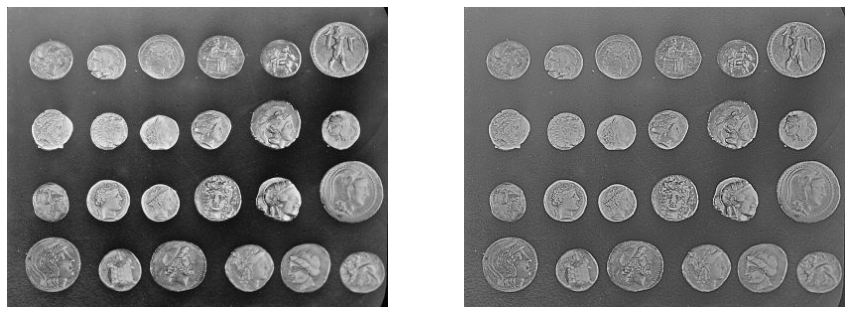

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from imageio import imread
from skimage import data
from scipy.ndimage.filters import gaussian_filter
from skimage.filters import unsharp_mask 


# Load an image
#image = imread('some_file.png.jpg', mode='F')
image = data.coins().astype(np.float32)

# Define sharpening amount
amount = 1.5

# Define the filters:
gauss_5 = 1/256 * np.asarray([[1, 4, 6, 4,1],
                              [4,16,24,16,4],
                              [6,24,36,24,6],
                              [4,16,24,16,4],
                              [1, 4, 6, 4,1]])
filtered_image = sp.ndimage.convolve(image, gauss_5)

unsharped_mask_image = image + (image - filtered_image) * amount

fig = plt.figure(figsize=(15,7))
a=fig.add_subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(unsharped_mask_image, cmap = 'gray')
plt.axis('off')
plt.show()

## Assignment 3: Implementing Convolution [8 Points]

Now implement your own 2-dimensional convolution function. The function should take an image and a kernel a argument and return an image of the same size, containing the result of convolving the image with the kernel.

You may notice a problem at the boundaries of the image. Describe the problem and possible solutions. Implement at least one of them.

Then apply your function with different kernels. Compare the results with [Assignment 2](#Assignment-2:-Applying-Convolution-[4-Points]).

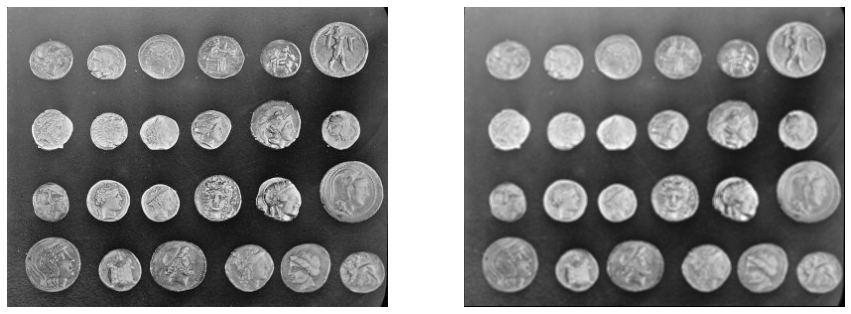

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from skimage import data

def my_convolve2d(img, kern):
    """Convolve an image with a kernel.

    Args:
        img (np.ndarray): The image, provided as a two-dimensional array.
        kern (np.ndarray): The kernel, also a two-dimensional array.
        
    Returns:
        result (np.ndarray): The convolved image. 
        
    """
    
    # store the image size for easier access
    M,N = img.shape
    # store the kernel size
    m,n = kern.shape
    # and also the half kernel size
    mh, nh = (m//2, n//2)
    
    # Initialize the result matrix
    result = np.zeros((M,N))
    
    # Compute the convolution
    for image_row in range(M - mh):
        for image_pixel in range(N - nh):
            value = 0
            for kernel_row in range(m):
                for kernel_element in range(n):
                    value += img[image_row - mh + kernel_row][image_pixel - nh + kernel_element] * kern[kernel_row][kernel_element]
            result[image_row][image_pixel] = value
    return result

# Apply your function to an image:
# Try different filters, compare the results with Assignment 2

# Load the image
image = data.coins().astype(np.float32)

box_3 = 1/9 * np.asarray([[1,1,1],[1,1,1],[1,1,1]])
filtered_image = my_convolve2d(image,box_3)
fig = plt.figure(figsize=(15,7))
a=fig.add_subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(filtered_image, cmap = 'gray')
plt.axis('off')
plt.show()

## Bonus Assignment: Optical music recognition (OMR)

If you solve this assignment you may leave out one of the other assignments. There will be similar assignments on most of the following sheets.  These bonus assignments are intended to show potential applications of the techniques you learnt in class. They are usually a bit more challenging and often there exist multiple ways to address them. Even if you do not intend to solve them, you may profit from at least taking a look.

**Background:** [Optical music recognition](https://en.wikipedia.org/wiki/Optical_music_recognition) "is a field of research that investigates how to computationally read musical notation in documents. The goal of OMR is to teach the computer to read and interpret sheet music and produce a machine-readable version of the written music score. Once captured digitally, the music can be saved in commonly used file formats, e.g. MIDI (for playback) and MusicXML (for page layout)."

**Data:** The freely available [CVC-MUSCIMA dataset](http://www.cvc.uab.es/cvcmuscima/index_database.html) contains 1000 high-quality images of handwritten music scores, transcribed by 50 different musicians. This dataset has been further extended into the [MUSCIMA++ dataset](https://ufal.mff.cuni.cz/muscima), which contains detailed annotations for 140 out of the 1000 pages. Both datasets are still used for developing and evaluating OMR systems.

**Task:** staff removal. The goal is to remove the staff, that is the horizontal lines on which musical symbols are placed, and to only keep the symbols. That is a common preprocessing step in many OMR approaches. We have provided three examples from the CVC-MUSCIMA dataset (`p001.png`, `p002.png`, and `p003.png`) along with the official solutions, showing the expected result (`p001-solution.png`, `p002-solution.png`, and `p003-solution.png`).

**Hints:**
* think what kind of filtering could help to solve this task
* experiment with different kernels, varying shape and size. They do not have to be quadratic.
* start working on a small image patch
* resize image if appropriate
* you may use function from libraries like [scikit-image](https://scikit-image.org/), e.g. the [`skimage.filters` module](https://scikit-image.org/docs/stable/api/skimage.filters.html), for working on this task

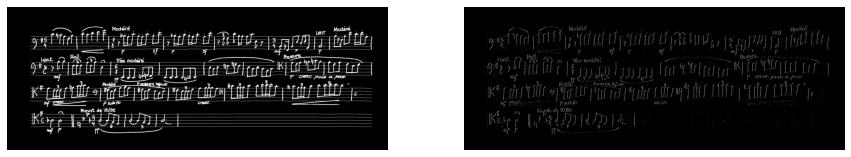

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from imageio import imread
from skimage import data
from scipy.ndimage.filters import sobel

# Load an image
image = imread('p001.png')

filtered_image = sp.ndimage.filters.sobel(image, axis=1)

fig = plt.figure(figsize=(15,7))
a=fig.add_subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(filtered_image, cmap = 'gray')
plt.axis('off')
plt.show()